In [12]:
import matplotlib.pyplot as plt
import lhapdf
import numpy as np
import json
import math

In [13]:
## Getting a PDF member object
set_cteq6 = lhapdf.getPDFSet("cteq6l1")
p_cteq6 = set_cteq6.mkPDFs()
#p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
#p_cteq6 = lhapdf.mkPDF("cteq6l1/0")

LHAPDF 6.3.0 loading all 1 PDFs in set cteq6l1
cteq6l1, version 4; 1 PDF members


In [11]:
Q2 = [4,4.75,5,5.75,6.09]
Q=math.sqrt(Q2[4])
print("Q2 is ",Q*Q)
x_axis = np.arange(0.01,0.99,0.01)
y_dv=[]
y_uv=[]
y_dbar=[]
y_ubar=[]
y_g = []
y_dv_err = []
y_uv_err = []
for x in np.arange(0.01,0.99,0.01):
    y_dv.append(p_cteq6[0].xfxQ(1,x,Q))
    y_uv.append(p_cteq6[0].xfxQ(2,x,Q))
    y_dbar.append(p_cteq6[0].xfxQ(-1,x,Q))
    y_ubar.append(p_cteq6[0].xfxQ(-2,x,Q))
    y_g.append(p_cteq6[0].xfxQ(0,x,Q))
    y_dv_err.append(set_cteq6[0].uncertainty(1,x,Q).errsymm)
    y_uv_err.append(set_cteq6[0].uncertainty(2,x,Q).errsymm)
#y_uv[0] = 0    
plt.plot(x_axis,y_dv,label=r"$d_v$")
plt.plot(x_axis,y_uv,label=r"$u_v$")
#plt.plot(x_axis,y_1,label=r"$g$")
plt.plot(x_axis,y_dbar,label=r"$\bar d$")
plt.plot(x_axis,y_ubar,label=r"$\bar u$")
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str = str(Q*Q)
plt.title(r"$Q^2$ is "+Q2_str[0:5])
plt.legend()

Q2 is  6.089999999999999


TypeError: 'lhapdf.PDFSet' object is not subscriptable

In [21]:
u_bar=np.asarray(y_ubar)
d_bar=np.asarray(y_dbar)
u_v=np.asarray(y_uv)
d_v=np.asarray(y_dv)
R_sea_NS=5*(u_bar+d_bar)/(u_v+d_v)
Bxz=R_sea_NS


Text(0, 0.5, '$R_{sea_{NS}}$')

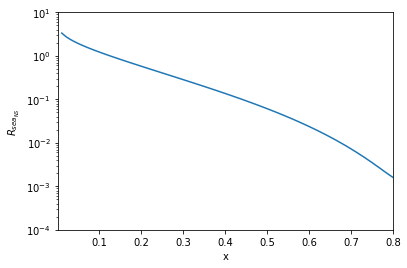

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(x_axis,Bxz,label="B(x)")
ax.set_yscale("log")
plt.ylim(1e-4,1e1)
plt.xlim(0.001,0.8)
plt.xlabel("x")
plt.ylabel(r"$R_{sea_{NS}}$")

Text(0.5, 0, 'x')

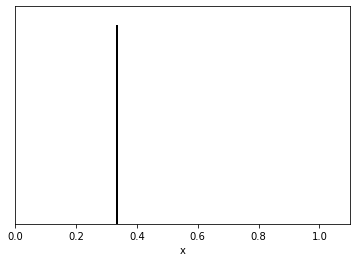

In [31]:
plt.plot([1/3, 1/3], [0, 1], color='k', linestyle='-', linewidth=2)
plt.ylim(1e-4,1.1)
plt.xlim(0,1.1)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel("x")


Text(0.5, 0, 'x')

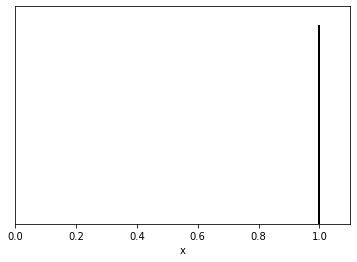

In [30]:
plt.plot([1, 1], [0, 1], color='k', linestyle='-', linewidth=2)
plt.ylim(1e-4,1.1)
plt.xlim(0,1.1)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.xlabel("x")



In [34]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def func(data, a, b, c):
    x = data[0]
    y = data[1]
    return (a * x) + (y * b) + c


if __name__ == "__main__":
    xData = numpy.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
    yData = numpy.array([11.0, 12.1, 13.0, 14.1, 15.0, 16.1, 17.0, 18.1, 90.0])
    zData = numpy.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.0, 9.9])

    data = [xData, yData, zData]

    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xData, yData], zData, p0 = initialParameters)

    ScatterPlot(data)
    SurfacePlot(func, data, fittedParameters)
    ContourPlot(func, data, fittedParameters)

    print('fitted prameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters) 

    absError = modelPredictions - zData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(zData))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

ModuleNotFoundError: No module named 'scipy'